<center><h1>Mini Project 1</h1></center>
<center><h2>Watchanan Chantapakul (<a href="mailto:wcgzm@umsystem.edu"><code>wcgzm</code></a>)</h2></center>
<hr />

# Part A: Original feature space and Euclidean distance

Given the dataset with four-classes (you can download from the [link](http://vigir.ee.missouri.edu/~gdesouza/ece7720/Homework/data_class4.mat) provided on Canvas as .mat) where each class follows a specific distribution:

In [1]:
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from math import pi

In [2]:
mat = loadmat(os.path.join("data", "data_class4.mat"))
data = mat["Data"][0]

In [3]:
C = data.shape[0]
C

4

In [4]:
D = data[0].shape[0]
D

2

In [5]:
N = np.zeros(C)
for c in range(C):
    N[c] = data[c].shape[1]
print("N", N)

N [400. 400. 600. 400.]


In [6]:
data[0].shape

(2, 400)

- There are 4 classes, $C = 4$ and $c = 1,...,C$.
- Each class has 400 patterns/samples/vectors, $N = 400$.
- Each sample $\vec{x_i}$ is a 2-d vector, $i=1,...,N$.

## 1. Estimate the mean and covariance of each class distribution using a library function (i.e. Matlab toolbox, or Python statistics package, etc.). Report on their values.

### Compute means $\mu$

$$\vec{\mu_c}\mathbf(x) = \frac{1}{N}\sum_{i=1}^{N_c}\vec{x_i}$$

In [7]:
means = []
for c in range(C):
    mu = np.mean(data[c], axis=1)
    means.append(mu)
    print(f"mu {c} = {mu}")
means = np.array(means)

mu 0 = [9.93166666 5.04771704]
mu 1 = [ 6.89476702 -3.06678779]
mu 2 = [-1.96618141 -2.05252646]
mu 3 = [-1.85830966  2.96492564]


### Compute variances $\sigma^2$

$$ \vec{\sigma^2_c}(\mathbf{x}) = \frac{1}{N-ddof} \sum_{i=1}^{N_c}(\vec{x_i}-\vec{\mu_c})^2 $$

- $\sigma^2_c$ is the population variance of class $c$.

Note: `numpy` computes variance depending on *delta degrees of freedom* (ddof). So, in order to compute a sample variance, ddof must be set to 1.

In [8]:
# numpy's built-in function for computing covariance matrix

np_covariances = []
for c in range(C):
    cov = np.cov(data[c], ddof=1)
    np_covariances.append(cov)
#     print(f"covariance {c} \n {cov}")
np_covariances = np.array(np_covariances)

In [9]:
# my function for computing covariance matrix (without optimization)

covariances = np.zeros((C, D, D))
for c in range(C):
    for i in range(D):
        for j in range(D):
            cov = np.sum((data[c][i] - means[c][i]) * (data[c][j] - means[c][j])) / (N[c]-1.)
            covariances[c, i, j] = cov
#             print(f"covariance {c} {i} {j} = {cov}")
                
print("covariances\n", covariances)

covariances
 [[[ 2.92878667  1.34060751]
  [ 1.34060751  4.14604723]]

 [[ 1.90650611  1.2951869 ]
  [ 1.2951869   2.03553604]]

 [[ 6.69513194  1.01051255]
  [ 1.01051255  1.17354871]]

 [[ 1.90363212 -0.53673905]
  [-0.53673905  0.66481358]]]


In [10]:
np.sum((data[c][i] - means[c][i])**2) / (N-1)

array([0.66481358, 0.66481358, 0.44283909, 0.66481358])

In [11]:
def compute_eigenvalues(A):
    a = 1
    b = - (A[0, 0] + A[1, 1])
    c = (A[0, 0] * A[1, 1]) - (A[1, 0] * A[0, 1])
    
    def solve_quadratic(a, b, c):
        term1 = np.sqrt((b**2) - (4 * a * c))
        denom = (2 * a)
        ans1 = (-b - term1) / denom
        ans2 = (-b + term1) / denom
        return ans1, ans2

    return solve_quadratic(a, b, c)

In [12]:
eigenvalues, eigenvectors = [], []
for c in range(C):
    val, vec = np.linalg.eig(covariances[c])
    eigenvalues.append(val)
    eigenvectors.append(vec)
#     eigenvalues.append(compute_eigenvalues(covariances[c]))
eigenvalues = np.array(eigenvalues)
eigenvectors = np.array(eigenvectors)

In [13]:
eigenvalues

array([[2.06511966, 5.00971424],
       [0.67422839, 3.26781376],
       [6.87425631, 0.99442435],
       [2.10383047, 0.46461523]])

#### Check that the computed eigenvectors are perpendicular to each other.

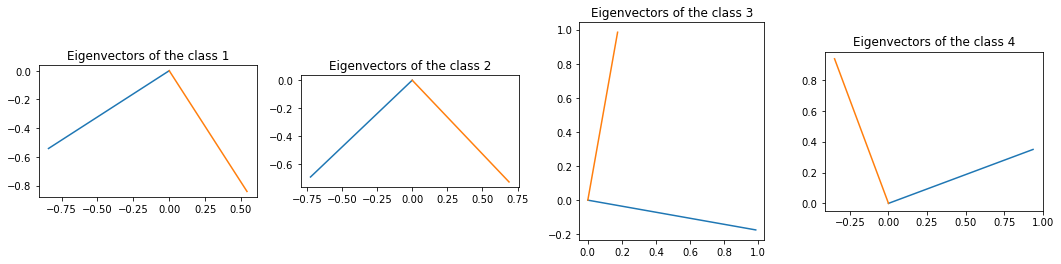

In [14]:
fig = plt.figure(figsize=(18, 4))
for cc in range(C):
    ax = fig.add_subplot(140 + cc + 1)
    ax.plot([0, eigenvectors[cc, 0, 0]], [0, eigenvectors[cc, 0, 1]])
    ax.plot([0, eigenvectors[cc, 1, 0]], [0, eigenvectors[cc, 1, 1]])
    ax.set_aspect(1)
    ax.set_title(f"Eigenvectors of the class {cc+1}")
plt.show()

## 2. Plot the data in each of the four classes using different colors and display their eigen-vectors.

## 3. Consider the following four test samples in the table below 1:

| Test Samples | x-value | y-value |
|--------------|---------|---------|
| s1           | 2.3     | 1.9     |
| s2           | 7       | -0.3    |
| s3           | 10      | 0.5     |
| s4           | -1.2    | 0.6     |
<center>Table 1: Test Samples to be classified</center>

### (a) On the same previous plot, display the four test samples.

In [15]:
test_samples = np.array([[2.3, 1.9], [7, -0.3], [10, 0.5], [-1.2, 0.6]])

#### [Ellipse equation](https://math.stackexchange.com/a/2647450)

$$ x(\alpha)=\sigma^2_{c,x} \cos(\alpha)\cos(\theta) − \sigma^2_{c,y} \sin(\alpha)\sin(\theta) + \mu_{c,x} $$
$$ y(\alpha)=\sigma^2_{c,x} \cos(\alpha)\sin(\theta) + \sigma^2_{c,y} \sin(\alpha)\cos(\theta) + \mu_{c,y} $$

- $\theta \in [0, 2\pi]$ (to draw an ellipse, we will use all angles in this range)
- $\alpha \in [0, 2\pi]$ is the rotation radians
- $\sigma^2_{c,d}$ is the variance of class $c$ in dimension $d$
- $\mu_{c,d}$ is the mean of class $c$ in dimension $d$

Here, the angle $\alpha$ is computed from:
$$ \alpha = \operatorname{arctan} \left( \frac{\vec{\phi_{i, 2}}}{\vec{\phi_{i, 1}}} \right) $$

The length of an eigenvector is scaled by the factor of the associated eigenvalue $\lambda_i$. Thus, an axis of a distribution is $ \lambda_i \vec{\phi_i} $.

In [16]:
def visualize_space(data, means, eigenvalues, eigenvectors, title=None, save_name=None, figsize=(10, 9), test_samples=None, test_index=None, distances=None, norm="2"):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    colors = ["blue", "red", "orange", "green"]
    for c in range(C):
        # patterns
        ax.scatter(data[c][0], data[c][1], color=colors[c], label=f"class {c+1}")
        # mean
        mean_x, mean_y = means[c]
        ax.scatter(mean_x, mean_y, color=colors[c], marker="*", edgecolor="black", s=150, linewidth=2, label=f"mean {c+1}")
        # variance
        theta = np.linspace(0, 2*np.pi, 100)

        major_idx = np.argmax(eigenvalues[c])
#         minor_idx = np.argmin(eigenvalues[c])
        # HOTFIX: argmax = argmin causes a problem
        minor_idx = 1 if major_idx == 0 else 0
        alpha = np.arctan2(eigenvectors[c, 1, major_idx], eigenvectors[c, 0, major_idx])
        major_r_x = eigenvalues[c, major_idx]
        major_r_y = eigenvalues[c, minor_idx]
        AXIS_COLORS = ["black", "grey"]
        axis_colors = [AXIS_COLORS[major_idx], AXIS_COLORS[minor_idx]]

        e_X = major_r_x * np.cos(theta) * np.cos(alpha) - major_r_y * np.sin(theta) * np.sin(alpha) + mean_x
        e_Y = major_r_x * np.cos(theta) * np.sin(alpha) + major_r_y * np.sin(theta) * np.cos(alpha) + mean_y
        ax.plot(e_X, e_Y, color="black", linestyle="--")

        ax.plot([mean_x, mean_x+eigenvalues[c, major_idx]*eigenvectors[c, 0, major_idx]], [mean_y, mean_y+eigenvalues[c, major_idx]*eigenvectors[c, 1, major_idx]], linewidth=3, color=axis_colors[0])
        ax.plot([mean_x, mean_x+eigenvalues[c, minor_idx]*eigenvectors[c, 0, minor_idx]], [mean_y, mean_y+eigenvalues[c, minor_idx]*eigenvectors[c, 1, minor_idx]], linewidth=3, color=axis_colors[1])
#         print(np.power((mean_x+eigenvalues[c, major_idx]*eigenvectors[c, 0, major_idx]) - mean_x, 2) + np.power((mean_y+eigenvalues[c, major_idx]*eigenvectors[c, 1, major_idx]) - mean_y, 2))
#         print(np.power((mean_x+eigenvalues[c, minor_idx]*eigenvectors[c, 0, minor_idx]) - mean_x, 2) + np.power((mean_y+eigenvalues[c, minor_idx]*eigenvectors[c, 1, minor_idx]) - mean_y, 2))

    # test samples
    if test_samples is not None:
        ax.scatter(test_samples[:, 0], test_samples[:, 1], color="deeppink", marker="x", label="test samples", edgecolor="black", s=50, linewidth=3)
    # distances
    if distances is not None:
        s_x, s_y = test_samples[test_index, 0], test_samples[test_index, 1]
        for c in range(C):
            mu_x, mu_y = means[c]
            ax.plot([s_x, mu_x], [s_y, mu_y], linewidth=3, color="plum")
            ax.text((s_x + mu_x) / 2, (s_y + mu_y) / 2, f"{distances[c]:.2f}")
        predicted_c = np.argmin(distances)
        print("predicted_c", predicted_c + 1)
        ax.plot([s_x, means[predicted_c, 0]], [s_y, means[predicted_c, 1]], linewidth=3, color="darkviolet", label=f"$\\min ||\\vec \mu_i  - \\vec s_j||_{norm}$")

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

    handles, labels = ax.get_legend_handles_labels()
    handles.append(Line2D([0], [0], color="black", linewidth=3, linestyle='--'))
    labels.append("$\sigma^2_{c}$")
    
    if distances is not None:
        handles.insert(0, Line2D([0], [0], color="plum", linewidth=3, linestyle='-'))
        labels.insert(0, f"$||\\vec \mu_i  - \\vec s_j||_{norm}$")
        
    ax.set_aspect(1)

    plt.legend(handles, labels)
    if title is not None:
        plt.title(title)
    plt.tight_layout()
#     if save_name is not None:
#         plt.savefig(save_name, dpi=300)

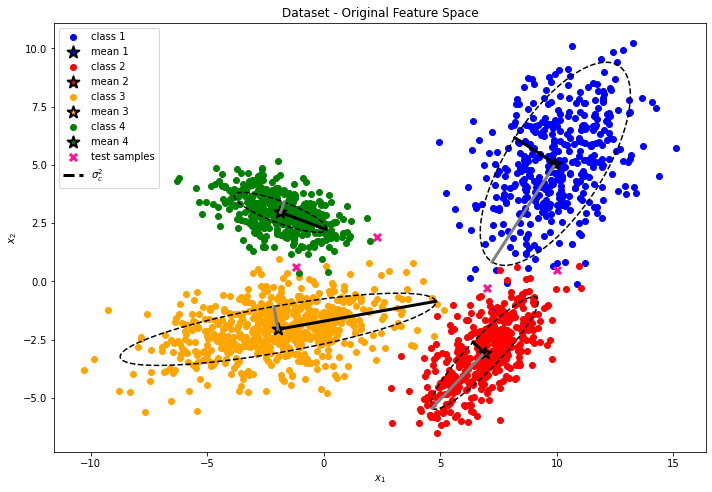

In [17]:
visualize_space(data, means, eigenvalues, eigenvectors, title="Dataset - Original Feature Space", save_name="dataset-original_feature_space.png", test_samples=test_samples) # (10, 7)

### (b) Compute the Euclidean distances $d(\mu_i, s_j)$ between the center of each class $i = 1, 2, 3, 4$ and the test samples $j = 1, 2, 3, 4.$

$$ d(\mu_c, s_j) = ||\vec{\mu_c} - \vec{s_j}||_2 $$

- $d_{c,j}$ is the distance between center of class $c$ and test sample $j$
- $\vec{s_j}$ is the test sample $j$

In [18]:
J = test_samples.shape[0]
distances = np.zeros((C, J))

def euclidean_distance(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)))

for c in range(C):
    for j in range(J):
        distances[j, c] = euclidean_distance(test_samples[j], means[c])

distances

array([[ 8.2553291 ,  6.76615584,  5.81573462,  4.29250578],
       [ 6.09858565,  2.7687883 ,  9.13585015,  9.44083627],
       [ 4.5482304 ,  4.72910637, 12.23539492, 12.11178626],
       [11.98733454,  8.88653958,  2.76096551,  2.45484111]])

#### Classification based on Euclidean distance

$$ \omega^* = \underset{i}{\operatorname{argmin}} d(\vec{\mu_c}, \vec{s_j}) $$

- $\omega^*$ is the predicted class

In the plotted figures belolw, the purple line indicates the minimum distance popped out from the other three distances.

predicted_c 4
predicted_c 2
predicted_c 1
predicted_c 4


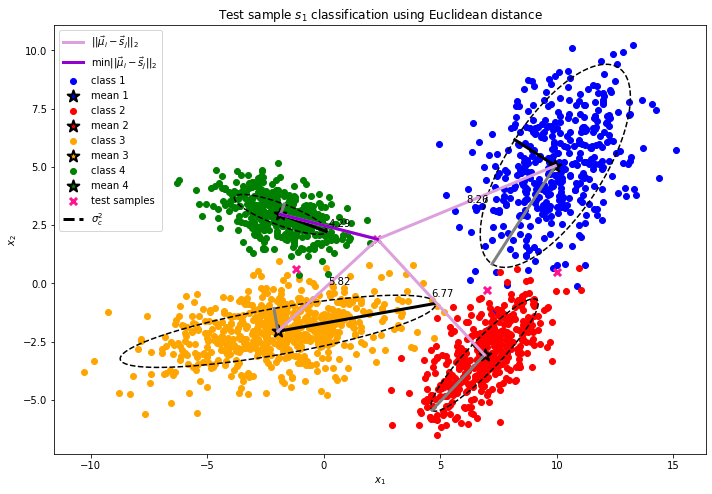

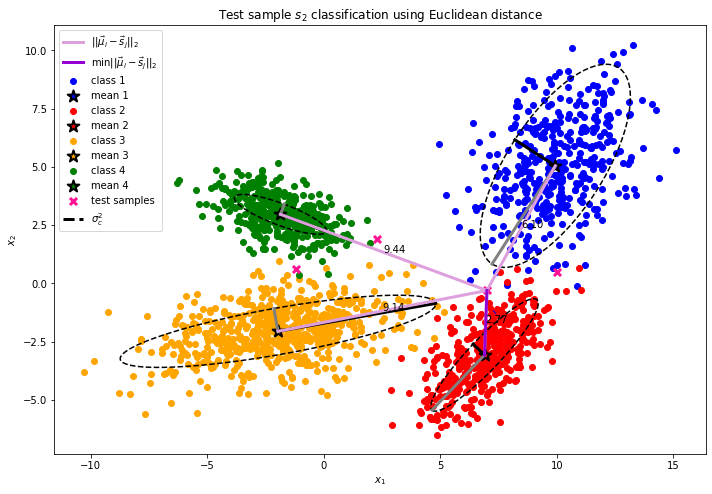

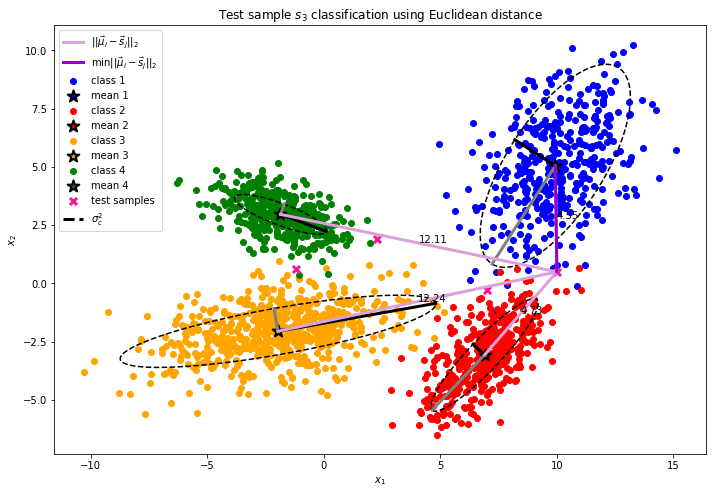

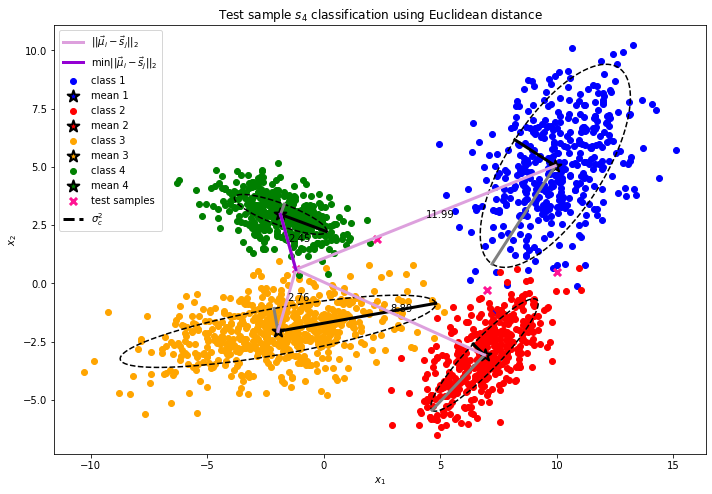

In [19]:
for j in range(J): # each test sample
    visualize_space(data, means, eigenvalues, eigenvectors, title=f"Test sample $s_{j+1}$ classification using Euclidean distance", save_name=f"test_samples-euclidean_distances-{j+1}.png", test_samples=test_samples, test_index=j, distances=distances[j]) # (10, 7)

In [20]:
def print_report_table(distances):
    for i in range(distances.shape[0]):
        print(f"| s{i+1} | ", end="")
        for j in range(distances.shape[1]):
            print(f"{distances[i, j]:.4f}", end=" | ")
        c = np.argmin(distances[i])
        print(f"class {c+1} | ")

In [21]:
print_report_table(distances)

| s1 | 8.2553 | 6.7662 | 5.8157 | 4.2925 | class 4 | 
| s2 | 6.0986 | 2.7688 | 9.1359 | 9.4408 | class 2 | 
| s3 | 4.5482 | 4.7291 | 12.2354 | 12.1118 | class 1 | 
| s4 | 11.9873 | 8.8865 | 2.7610 | 2.4548 | class 4 | 


### (c) Classify the test samples accordingly and report the results in the following table 2:

| Test Samples | d($\mu_1$,$s_j$) | d($\mu_2$,$s_j$) | d($\mu_3$,$s_j$) | d($\mu_4$,$s_j$) | Class Assignment |
|--------------|-------------:|--:|--:|--:|------------------|
| s1 | 8.2553 | 6.7662 | 5.8157 | 4.2925 | class 4 |
| s2 | 6.0986 | 2.7688 | 9.1359 | 9.4408 | class 2 |
| s3 | 4.5482 | 4.7291 | 12.2354 | 12.1118 | class 1 |
| s4 | 11.9873 | 8.8865 | 2.7610 | 2.4548 | class 4 |
<center>Table 2: Euclidean distances and classification results in the original feature space</center>

<hr />

## Part B: Whitened space and Euclidean distance

### 1. Apply a whitening transformation to the data in each of the classes according to their own parameters (i.e. Mean and Covariance)


#### Whitened mean

$$ \vec{\mu_{W, c}}(\mathbf{x}) = \Lambda^{-\frac{1}{2}}_c \Phi^\text{T}_c \vec{\mu_{x, c}} $$

- $\Lambda^{-\frac{1}{2}}_c \Phi^\text{T}_c$ is the transformation matrix or whitening matrix, of class $c$.
- $\vec{\mu_{x, c}}$ is the mean of the original feature space of class $c$

#### Whitened covariance

$$ \Sigma_{W, c} = \Lambda^{-\frac{1}{2}}_c \Phi^\text{T}_c \Sigma_{c} \Phi_c \Lambda^{-\frac{1}{2}}_c = I $$

- $\Sigma_{W, c}$ is the whitened covariance matrix.

The whitened covariance matrix $\Sigma_w$ becomes an identity matrix as it is transformed by rotating and squishing. Therefore, $\Phi^\text{T}_c \Sigma_{c} \Phi_c$ is equal to $\Lambda_c$, so that it cancels the other two $\Lambda^{-\frac{1}{2}}_c$'s out.
$$ \Phi^\text{T}_c \Sigma_{c} \Phi_c = \Lambda_c $$
$$ \Lambda^{-\frac{1}{2}}_c \Lambda_c \Lambda^{-\frac{1}{2}}_c = I $$

#### Whitened data sample
We can whiten a data sample just like when we apply whitening transformation to a mean vector $\vec{\mu_{x, c}}$. However, it must be transformed with the corresponding $\Lambda$ and $\Phi$.
$$ \vec{x_{W, c}} = \Lambda^{-\frac{1}{2}}_c \Phi^\text{T}_c \vec{x} $$

In [22]:
squishing_matrices = np.zeros_like(covariances)
whitened_data = np.zeros_like(data)
whitened_means = np.zeros_like(means)
whitened_covariances = np.zeros_like(covariances)
whitened_eigenvalues = np.zeros_like(eigenvalues)
whitened_eigenvectors = np.zeros_like(eigenvectors)

for c in range(C):
    squishing_matrices[c] = np.sqrt(np.linalg.inv(np.identity(D) * eigenvalues[c]))
    whitened_data[c] = squishing_matrices[c] @ eigenvectors[c].T @ data[c]
    whitened_means[c] = squishing_matrices[c] @ eigenvectors[c].T @ means[c]
    whitened_covariances[c] = squishing_matrices[c] @ eigenvectors[c].T @ covariances[c] @ eigenvectors[c] @ squishing_matrices[c]
    whitened_eigenvalues[c], whitened_eigenvectors[c] = np.linalg.eig(np.cov(whitened_data[c]))

Notice the values of all whitened covariance matrices. They are identity matrices as stated above. Well, the off diagonal values are not completely zero but they approach zero.

In [23]:
whitened_covariances

array([[[ 1.00000000e+00,  4.96025213e-17],
        [ 0.00000000e+00,  1.00000000e+00]],

       [[ 1.00000000e+00,  1.53540019e-16],
        [ 1.35209346e-16,  1.00000000e+00]],

       [[ 1.00000000e+00, -1.11333113e-16],
        [-1.16447472e-16,  1.00000000e+00]],

       [[ 1.00000000e+00,  0.00000000e+00],
        [ 7.65428907e-17,  1.00000000e+00]]])

#### Check that the computed eigenvectors are perpendicular to each other.

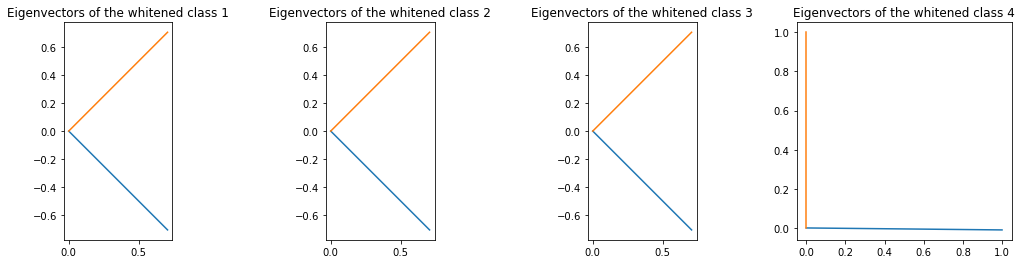

In [24]:
fig = plt.figure(figsize=(18, 4))
for cc in range(C):
    ax = fig.add_subplot(140 + cc + 1)
    ax.plot([0, whitened_eigenvectors[cc, 0, 0]], [0, whitened_eigenvectors[cc, 0, 1]])
    ax.plot([0, whitened_eigenvectors[cc, 1, 0]], [0, whitened_eigenvectors[cc, 1, 1]])
    ax.set_aspect(1)
    ax.set_title(f"Eigenvectors of the whitened class {cc+1}")
plt.show()

#### Whitened test sample
In order to whiten a test sample, as there are 4 classes, each test sample has to be whitened based on each distribution one at a time.

$$ \vec{s_j} = \Lambda^{-\frac{1}{2}}_i \Phi^\text{T}_i \vec{s_j} $$

In [25]:
whitened_test_samples= np.zeros((test_samples.shape[0], C, test_samples.shape[1]))

for j in range (J):
    for c in range(C):
        whitened_test_samples[j, c] = squishing_matrices[c] @ eigenvectors[c].T @ test_samples[j]

whitened_test_samples.shape

(4, 4, 2)

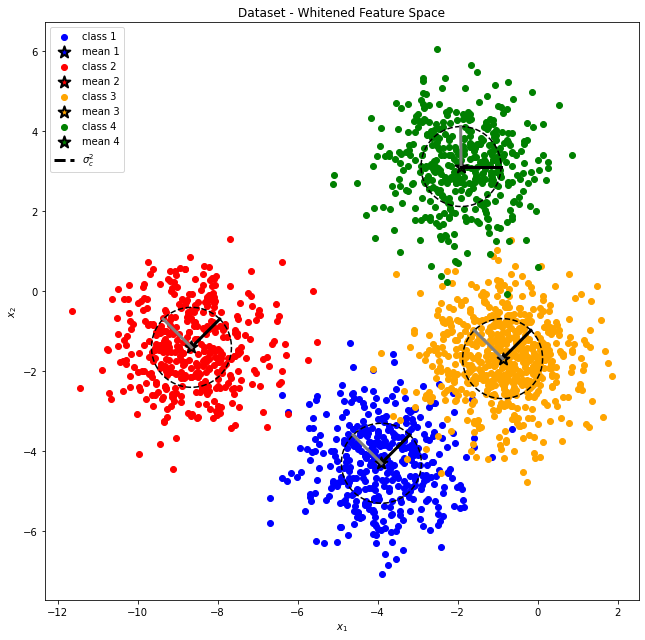

In [26]:
visualize_space(whitened_data, whitened_means, whitened_eigenvalues, whitened_eigenvectors, title="Dataset - Whitened Feature Space", save_name="dataset-whitened_feature_space.png")

In [27]:
whitened_distances = np.zeros_like(distances)

for c in range(C):
    for j in range(J):
        whitened_distances[j, c] = euclidean_distance(whitened_test_samples[j, c], whitened_means[c])

whitened_distances

array([[ 4.4631794 ,  8.2269217 ,  3.66605299,  3.01760914],
       [ 2.73444094,  2.50838516,  3.48764967,  6.50903569],
       [ 2.43665098,  2.62587407,  4.68324731,  8.68172594],
       [ 6.51365692, 10.34740388,  2.52802512,  3.07849649]])

#### Classification based on Euclidean distance in the whitened spaces

$$ \omega^* = \underset{i}{\operatorname{argmin}} d(\vec{\mu_c}, \vec{s_j}) $$

- $\omega^*$ is the predicted class

In [28]:
def visualize_whitened_space(data, means, eigenvalues, eigenvectors, title=None, save_name=None, figsize=(20, 6), test_samples=None, test_index=None, distances=None, norm="2"):
    fig, axs = plt.subplots(nrows=1, ncols=C, figsize=figsize)
    colors = ["blue", "red", "orange", "green"]
    for c in range(C):
        ax = axs[c]
        # patterns
        ax.scatter(data[c][0], data[c][1], color=colors[c], label=f"class {c+1}")
        # mean
        mean_x, mean_y = means[c]
        ax.scatter(mean_x, mean_y, color=colors[c], marker="*", edgecolor="black", s=150, linewidth=2, label=f"mean {c+1}")
        # variance
        theta = np.linspace(0, 2*np.pi, 100)

        major_idx = np.argmax(eigenvalues[c])
#         minor_idx = np.argmin(eigenvalues[c])
        # HOTFIX: argmax = argmin causes a problem
        minor_idx = 1 if major_idx == 0 else 0
        alpha = np.arctan2(eigenvectors[c, 1, major_idx], eigenvectors[c, 0, major_idx])
        major_r_x = eigenvalues[c, major_idx]
        major_r_y = eigenvalues[c, minor_idx]
        AXIS_COLORS = ["black", "grey"]
        axis_colors = [AXIS_COLORS[major_idx], AXIS_COLORS[minor_idx]]

        e_X = major_r_x * np.cos(theta) * np.cos(alpha) - major_r_y * np.sin(theta) * np.sin(alpha) + mean_x
        e_Y = major_r_x * np.cos(theta) * np.sin(alpha) + major_r_y * np.sin(theta) * np.cos(alpha) + mean_y
        ax.plot(e_X, e_Y, color="black", linestyle="--")

        ax.plot([mean_x, mean_x+eigenvalues[c, major_idx]*eigenvectors[c, 0, major_idx]], [mean_y, mean_y+eigenvalues[c, major_idx]*eigenvectors[c, 1, major_idx]], linewidth=3, color=axis_colors[0])
        ax.plot([mean_x, mean_x+eigenvalues[c, minor_idx]*eigenvectors[c, 0, minor_idx]], [mean_y, mean_y+eigenvalues[c, minor_idx]*eigenvectors[c, 1, minor_idx]], linewidth=3, color=axis_colors[1])
#         ax.quiver(mean_x, mean_y, eigenvectors[c, 0, major_idx], eigenvectors[c, 1, major_idx], scale=eigenvalues[c, major_idx], scale_units="xy", linewidth=3, color="orange")
#         ax.quiver(mean_x, mean_y, eigenvectors[c, 0, minor_idx], eigenvectors[c, 1, minor_idx], scale=eigenvalues[c, minor_idx], scale_units="xy", linewidth=3, color="yellow")
#         print(np.power((mean_x+eigenvalues[c, major_idx]*eigenvectors[c, 0, major_idx]) - mean_x, 2) + np.power((mean_y+eigenvalues[c, major_idx]*eigenvectors[c, 1, major_idx]) - mean_y, 2))
#         print(np.power((mean_x+eigenvalues[c, minor_idx]*eigenvectors[c, 0, minor_idx]) - mean_x, 2) + np.power((mean_y+eigenvalues[c, minor_idx]*eigenvectors[c, 1, minor_idx]) - mean_y, 2))

        # test samples
        if test_samples is not None:
            ax.scatter(test_samples[c, 0], test_samples[c, 1], color="deeppink", marker="x", label="test samples", edgecolor="black", s=50, linewidth=3)
        # distances
        if distances is not None:
            s_x, s_y = test_samples[c, 0], test_samples[c, 1]
            mu_x, mu_y = means[c]
            ax.plot([s_x, mu_x], [s_y, mu_y], linewidth=3, color="plum")
            ax.text((s_x + mu_x) / 2, (s_y + mu_y) / 2, f"{distances[c]:.2f}")

        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$x_2$")

        handles, labels = ax.get_legend_handles_labels()
        handles.append(Line2D([0], [0], color="black", linewidth=3, linestyle='--'))
        labels.append("$\sigma^2_{c}$")

        if distances is not None:
            handles.insert(0, Line2D([0], [0], color="plum", linewidth=3, linestyle='-'))
            labels.insert(0, f"$||\\vec \mu_i  - \\vec s_j||_{norm}$")

        ax.legend(handles, labels)
        
        ax.set_aspect(1)
        
    if title is not None:
        plt.suptitle(title)
    plt.tight_layout()
#     if save_name is not None:
#         plt.savefig(save_name, dpi=300)

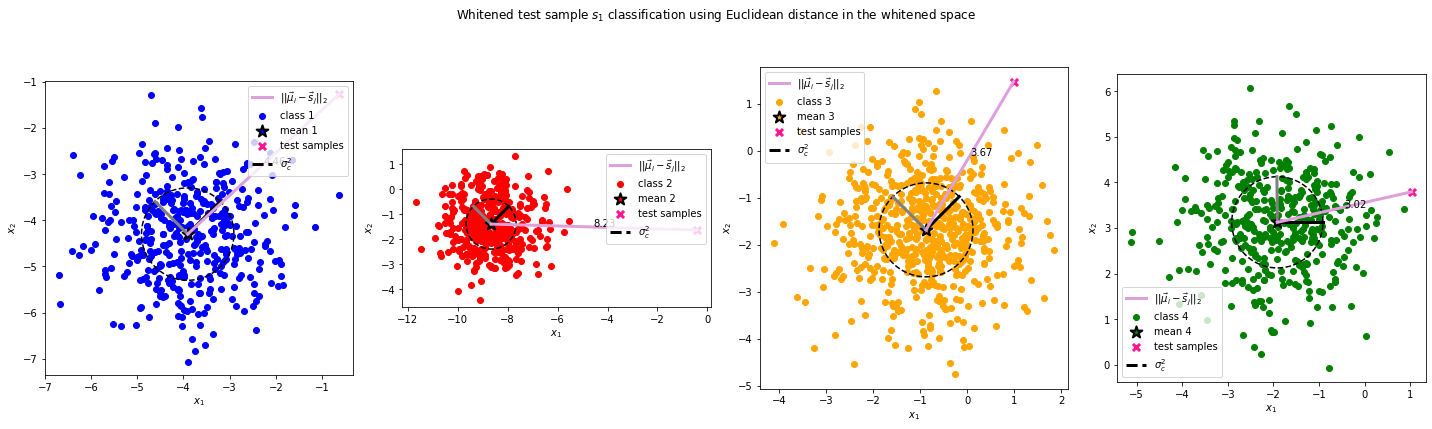

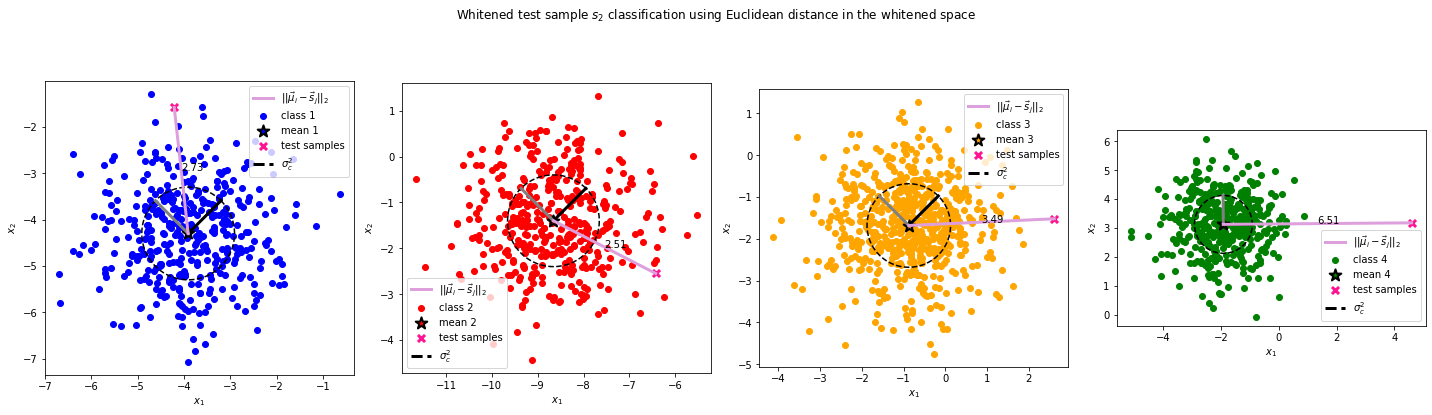

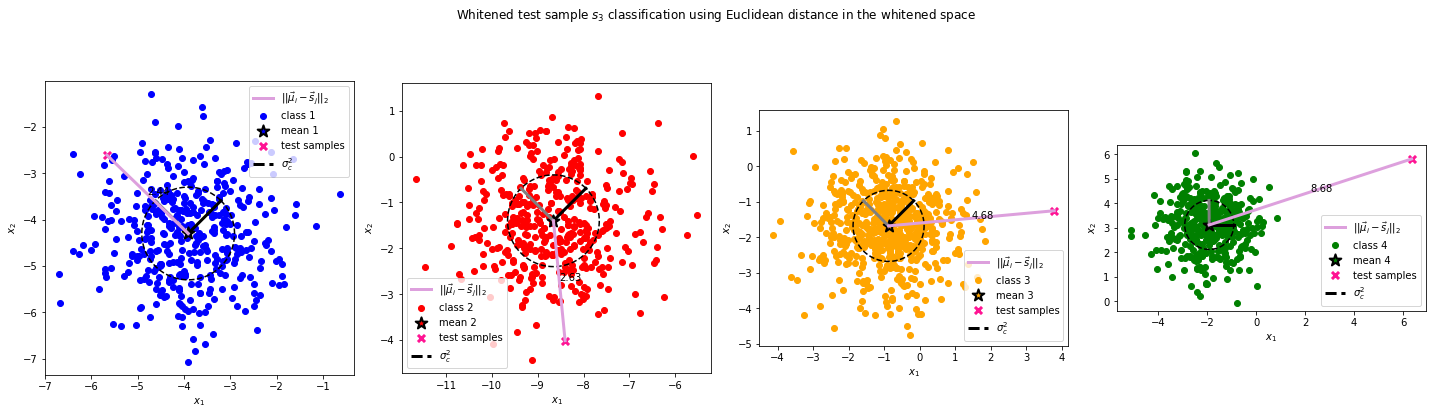

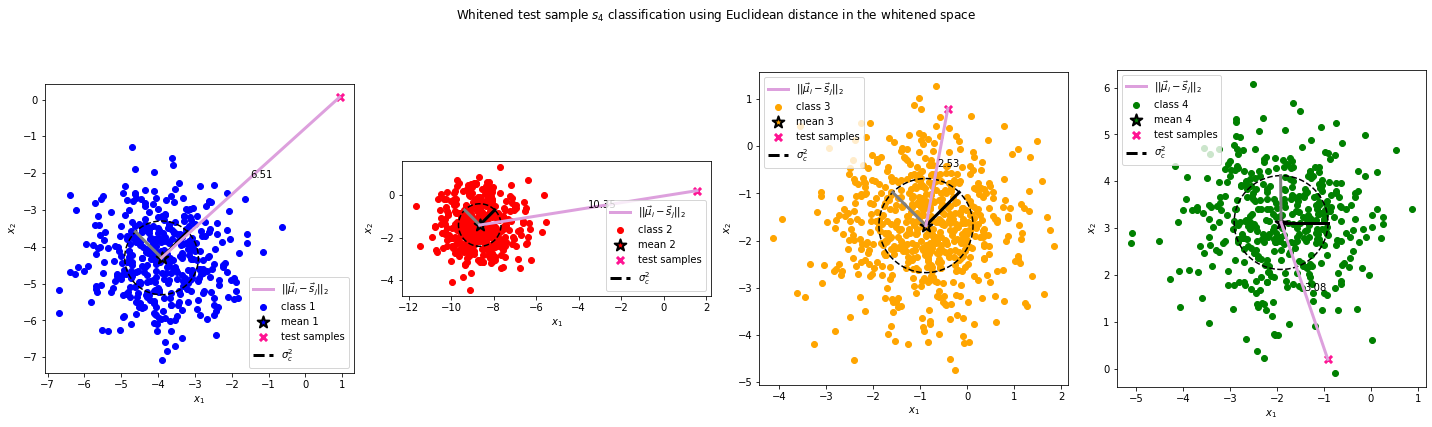

In [29]:
for j in range(J):
    visualize_whitened_space(whitened_data, whitened_means, whitened_eigenvalues, whitened_eigenvectors, title=f"Whitened test sample $s_{j+1}$ classification using Euclidean distance in the whitened space", save_name=f"whitened_test_samples-euclidean_distances-{j+1}.png", test_samples=whitened_test_samples[j], test_index=j, distances=whitened_distances[j])

In [30]:
# for filling in the report table

print_report_table(whitened_distances)

| s1 | 4.4632 | 8.2269 | 3.6661 | 3.0176 | class 4 | 
| s2 | 2.7344 | 2.5084 | 3.4876 | 6.5090 | class 2 | 
| s3 | 2.4367 | 2.6259 | 4.6832 | 8.6817 | class 1 | 
| s4 | 6.5137 | 10.3474 | 2.5280 | 3.0785 | class 3 | 


### 2. Repeat questions A.1, A.2 and A.3. but this time using the whitened data and whitened testing samples and report the results in the following table 3:

| Test Samples | d($\mu_1$,$s_j$) | d($\mu_2$,$s_j$) | d($\mu_3$,$s_j$) | d($\mu_4$,$s_j$) | Class Assignment |
|--------------|-------------:|--:|--:|--:|------------------|
| s1 | 4.4632 | 8.2269 | 3.6661 | 3.0176 | class 4 |
| s2 | 2.7344 | 2.5084 | 3.4876 | 6.5090 | class 2 |
| s3 | 2.4367 | 2.6259 | 4.6832 | 8.6817 | class 1 |
| s4 | 6.5137 | 10.3474 | 2.5280 | 3.0785 | class 3 |
<center>Table  3: Euclidean distances and classification results in the whitened space</center>

----------------

## Part C: Original feature space and Mahalanobis distance

### 1. Using the original dataset from Part A (ie. before whitening), repeat question A.3 using the Mahalanobis distances instead of the Euclidean $r(\mu_i, s_j)$ and report the results in the following table 4.

#### Mahalanobis distance
Mahalanobis distance is a way for computing the distance from a pattern to a distribution. It is preferable because we can perform the computation in the original feature space, i.e., we don't have to apply whitening transformation to the data.  It is defined as follows:
$$ r^2(\vec{\mu_c}, \vec{x_j}) = (\vec{x_j} - \vec{\mu_c})^{\text{T}} \Sigma_c^{-1} (\vec{x_j} - \vec{\mu_c}) $$

In [31]:
def mahalanobis_distance(x, mean, inv_cov):
    return np.sqrt((x - mean).T @ inv_cov @ (x - mean))

mahalanobis_distances = np.zeros_like(distances)
for c in range(C):
    inv_cov = np.linalg.inv(covariances[c])
    for j in range(J):
        mahalanobis_distances[j, c] = mahalanobis_distance(test_samples[j], means[c], inv_cov)

mahalanobis_distances

array([[ 4.4631794 ,  8.2269217 ,  3.66605299,  3.01760914],
       [ 2.73444094,  2.50838516,  3.48764967,  6.50903569],
       [ 2.43665098,  2.62587407,  4.68324731,  8.68172594],
       [ 6.51365692, 10.34740388,  2.52802512,  3.07849649]])

#### Classification based on Mahalanobis distance in the original feature spaces

$$ \omega^* = \underset{i}{\operatorname{argmin}} r(\vec{\mu_c}, \vec{s_j}) $$

- $\omega^*$ is the predicted class

predicted_c 4
predicted_c 2
predicted_c 1
predicted_c 3


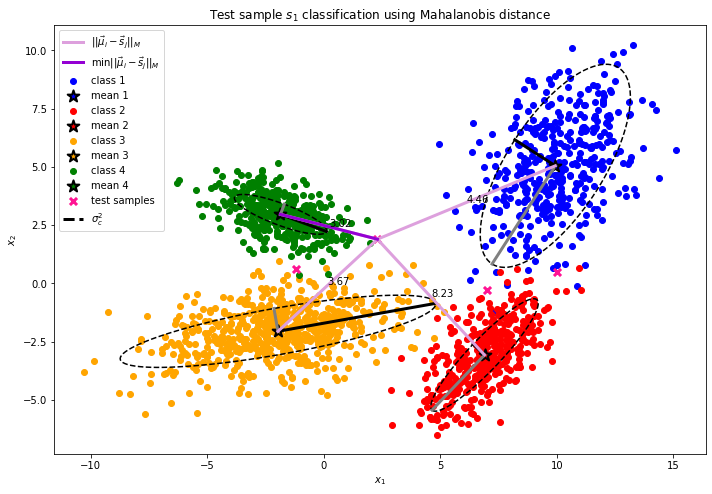

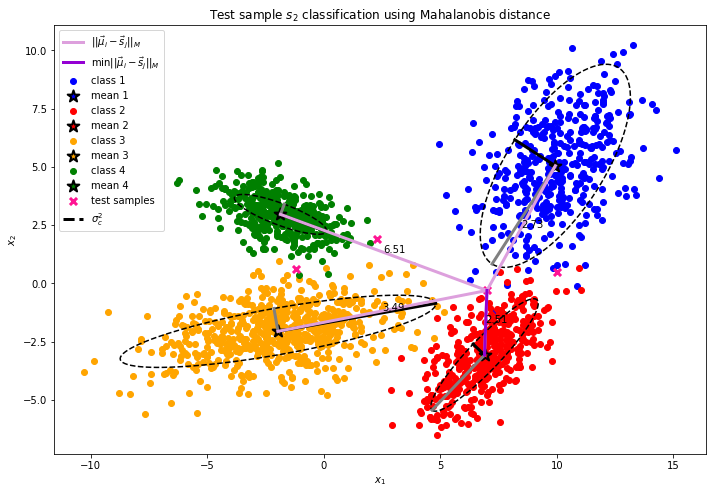

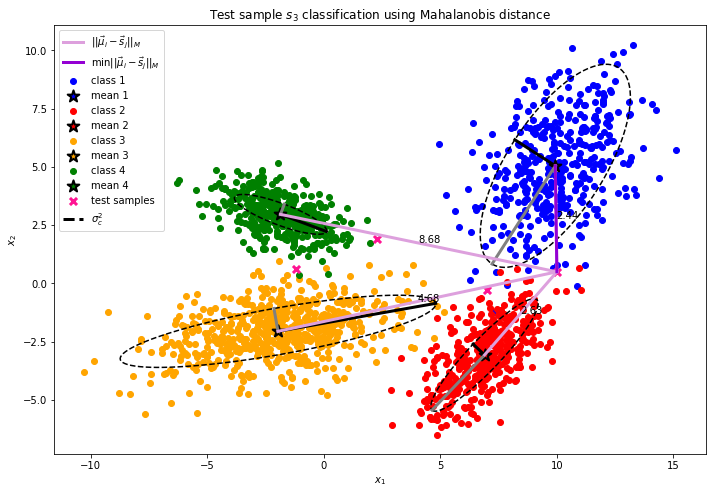

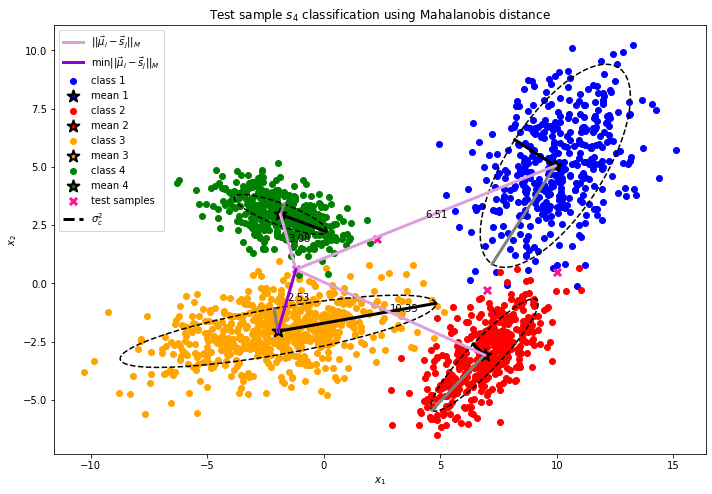

In [32]:
for j in range(J): # each test sample
    visualize_space(data, means, eigenvalues, eigenvectors, title=f"Test sample $s_{j+1}$ classification using Mahalanobis distance", save_name=f"test_samples-mahalanobis_distances-{j+1}.png", test_samples=test_samples, test_index=j, distances=mahalanobis_distances[j], norm="M") # (10, 7)

In [33]:
print_report_table(mahalanobis_distances)

| s1 | 4.4632 | 8.2269 | 3.6661 | 3.0176 | class 4 | 
| s2 | 2.7344 | 2.5084 | 3.4876 | 6.5090 | class 2 | 
| s3 | 2.4367 | 2.6259 | 4.6832 | 8.6817 | class 1 | 
| s4 | 6.5137 | 10.3474 | 2.5280 | 3.0785 | class 3 | 


| Test Samples | d($\mu_1$,$s_j$) | d($\mu_2$,$s_j$) | d($\mu_3$,$s_j$) | d($\mu_4$,$s_j$) | Class Assignment |
|--------------|-------------:|--:|--:|--:|------------------|
| s1 | 4.4632 | 8.2269 | 3.6661 | 3.0176 | class 4 |
| s2 | 2.7344 | 2.5084 | 3.4876 | 6.5090 | class 2 |
| s3 | 2.4367 | 2.6259 | 4.6832 | 8.6817 | class 1 |
| s4 | 6.5137 | 10.3474 | 2.5280 | 3.0785 | class 3 |
<center>Table  4:  Mahalanobis distances and classification results in the original feature space</center>

### 2. Compare Tables 2, 3, 4 and comment on the classification results.

<hr />

# Report:

> 1. Write and submit a Mini-Project Report 1 containing the answers to all the questions above, including a discussion on the results – i.e. the mean and covariance before and after the whitening; the class assignments in all three cases; etc.
> 2. Submit your implementations.

   
| Test Samples | x-value | y-value | 2-norm | 2-norm on whitened space | Mahalanobis distance|
|--------------|--------:|--------:|--------|--------------------------|---------------------|
| s1           | 2.3     | 1.9     | class 4 | class 4 | class 4 |
| s2           | 7       | -0.3    | class 2 | class 2 | class 2 |
| s3           | 10      | 0.5     | class 1 | class 1 | class 1 |
| s4           | -1.2    | 0.6     | class 4 | class 3 | class 3 |
<center>Table 5: Classification resuts of four test samples based on different methods.</center>

The classification results from using three approaches of the test samples $s_3, s_2, s_3$ are the same. They are classified as class 4, 2, and 1, respectively. Interestingly, the test sample $s_4$ is different. In the original feature space, it is classified by comparing euclidean distances to 4 classes, it turns out that $s_4$ is classified as class 4. But when it comes to the other two methods (whitening transformation and Mahalanobis distance), it is rather classified as class 3. For the Mahalanobis distances between the test sample $s_4$ and class distributions 3 and 4, they are really close. We obviously cannot use Euclidean distance here as the data of classes 3 and 4 are not aligned together. They spread in different directions.

## Comparing mean vectors

In [34]:
"Original means", means

('Original means',
 array([[ 9.93166666,  5.04771704],
        [ 6.89476702, -3.06678779],
        [-1.96618141, -2.05252646],
        [-1.85830966,  2.96492564]]))

In [35]:
"Whitened means", whitened_means

('Whitened means',
 array([[-3.90753781, -4.29897461],
        [-8.65781466, -1.39993863],
        [-0.87503941, -1.68254033],
        [-1.91477051,  3.12275049]]))

### Comparing covariance matrices

In [36]:
covariances

array([[[ 2.92878667,  1.34060751],
        [ 1.34060751,  4.14604723]],

       [[ 1.90650611,  1.2951869 ],
        [ 1.2951869 ,  2.03553604]],

       [[ 6.69513194,  1.01051255],
        [ 1.01051255,  1.17354871]],

       [[ 1.90363212, -0.53673905],
        [-0.53673905,  0.66481358]]])

In [37]:
whitened_covariances

array([[[ 1.00000000e+00,  4.96025213e-17],
        [ 0.00000000e+00,  1.00000000e+00]],

       [[ 1.00000000e+00,  1.53540019e-16],
        [ 1.35209346e-16,  1.00000000e+00]],

       [[ 1.00000000e+00, -1.11333113e-16],
        [-1.16447472e-16,  1.00000000e+00]],

       [[ 1.00000000e+00,  0.00000000e+00],
        [ 7.65428907e-17,  1.00000000e+00]]])

#### Whitened covariance matrices = identity matrices

In [38]:
I = []
for c in range(C):
    I.append(np.identity(whitened_covariances[c].shape[0]))
I = np.array(I)
I

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])

In [39]:
"Whitened covariance matrices = identity matrices", np.allclose(whitened_covariances, I)

('Whitened covariance matrices = identity matrices', True)

This means that our covariance matrices become identity matrices. It is the result from applying whitening transformation to the origin space. The data will spread in every direction equally. We can also see from the unit standard deviation of each class distribution.

## Comparing 3 distances

In [40]:
"Euclidean distances in the original feature space", distances

('Euclidean distances in the original feature space',
 array([[ 8.2553291 ,  6.76615584,  5.81573462,  4.29250578],
        [ 6.09858565,  2.7687883 ,  9.13585015,  9.44083627],
        [ 4.5482304 ,  4.72910637, 12.23539492, 12.11178626],
        [11.98733454,  8.88653958,  2.76096551,  2.45484111]]))

In [41]:
"Euclidean distances in the whitened space", whitened_distances, "Mahalanobis distances", mahalanobis_distances

('Euclidean distances in the whitened space',
 array([[ 4.4631794 ,  8.2269217 ,  3.66605299,  3.01760914],
        [ 2.73444094,  2.50838516,  3.48764967,  6.50903569],
        [ 2.43665098,  2.62587407,  4.68324731,  8.68172594],
        [ 6.51365692, 10.34740388,  2.52802512,  3.07849649]]),
 'Mahalanobis distances',
 array([[ 4.4631794 ,  8.2269217 ,  3.66605299,  3.01760914],
        [ 2.73444094,  2.50838516,  3.48764967,  6.50903569],
        [ 2.43665098,  2.62587407,  4.68324731,  8.68172594],
        [ 6.51365692, 10.34740388,  2.52802512,  3.07849649]]))

In [42]:
"Are they equivalent?", np.allclose(mahalanobis_distances, whitened_distances)

('Are they equivalent?', True)

### Why are they the same?

We can prove that a Euclidean distance in the whitened space equals a Mahalanobis distance.

Solve for $\Sigma_c$ based on the equation arose from whitening transformation.
$$ \Phi^\text{T}_c \Sigma_{c} \Phi_c = \Lambda_c $$
$$ (\Phi^\text{T}_c)^{-1} \Phi^\text{T}_c \Sigma_{c} \Phi_c = (\Phi^\text{T}_c)^{-1} \Lambda_c $$
$$ \Sigma_{c} \Phi_c = (\Phi^\text{T}_c)^{-1} \Lambda_c $$
$$ \Sigma_{c} \Phi_c \Phi_c^{-1} = (\Phi^\text{T}_c)^{-1} \Lambda_c \Phi_c^{-1} $$
$$ \Sigma_{c} = (\Phi^\text{T}_c)^{-1} \Lambda_c \Phi_c^{-1} $$
$$ \Sigma_{c} = (\Phi^\text{T}_c)^\text{T} \Lambda_c \Phi_c^\text{T} $$
$$ \Sigma_{c} = (\Phi^\text{T}_c) \Lambda_c^\text{T} \Phi_c $$
$$ \Sigma_{c} = \Phi^\text{T}_c \Lambda_c \Phi_c $$

Substitute $\Sigma_c$ to the Mahalanobis distance equation.
$$ r^2(\vec{\mu_c}, \vec{x_j}) = (\vec{x_j} - \vec{\mu_c})^{\text{T}} \Sigma_c^{-1} (\vec{x_j} - \vec{\mu_c}) $$
$$ = (\vec{x_j} - \vec{\mu_c})^{\text{T}} (\Phi_c \Lambda_c \Phi^\text{T}_c)^{-1} (\vec{x_j} - \vec{\mu_c}) $$
$$ = (\vec{x_j} - \vec{\mu_c})^{\text{T}} (\Phi_c \Lambda_c^{-1} \Phi^\text{T}_c) (\vec{x_j} - \vec{\mu_c}) $$
$$ = (\vec{x_j} - \vec{\mu_c})^{\text{T}} (\Phi_c \Lambda_c^{-\frac{1}{2}} \Lambda_c^{-\frac{1}{2}} \Phi^\text{T}_c) (\vec{x_j} - \vec{\mu_c}) $$
$$ = (\vec{x_j} - \vec{\mu_c})^{\text{T}} (\Phi_c \Lambda_c^{-\frac{1}{2}}) (\Lambda_c^{-\frac{1}{2}} \Phi^\text{T}_c) (\vec{x_j} - \vec{\mu_c}) $$
$$ = [(\Phi_c \Lambda_c^{-\frac{1}{2}})^{\text{T}} ((\vec{x_j} - \vec{\mu_c})^{\text{T}})^{\text{T}}]^{\text{T}} [(\Lambda_c^{-\frac{1}{2}} \Phi^\text{T}_c) (\vec{x_j} - \vec{\mu_c})] $$
$$ = [(\Phi_c \Lambda_c^{-\frac{1}{2}})^{\text{T}} (\vec{x_j} - \vec{\mu_c})]^{\text{T}} [(\Lambda_c^{-\frac{1}{2}} \Phi^\text{T}_c) (\vec{x_j} - \vec{\mu_c})] $$
$$ = [(\vec{x_{W, j}} - \vec{\mu_{W, c}})]^{\text{T}} [(\vec{x_{W, j}} - \vec{\mu_{W, c}})] $$
$$ = ||\vec{\mu_{W, c}} - \vec{x_{W, j}}||_2^2 $$
$$ = d^2(\vec{\mu_{W, c}}, \vec{x_{W, j}}) $$

Take the square root out.

$$ r^2(\vec{\mu_c}) = d^2(\vec{\mu_{W, c}}) $$
$$ r(\vec{\mu_c}) = d(\vec{\mu_{W, c}}) $$